In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA,KernelPCA

In [2]:
exp_path = "/home/bruce1996/data/LIHC_anomaly_detection/ensemble_training/lihc_coding_gene_std_by_gene_tumor_only.txt"
normal_path = "/home/bruce1996/data/LIHC_anomaly_detection/ensemble_training/lihc_coding_gene_std_by_gene_normal_only.txt"
tumor = pd.read_csv(exp_path,sep='\t',index_col=0)
normal = pd.read_csv(normal_path,sep='\t',index_col=0)
exp_profile = pd.concat([tumor,normal],axis=1)

hallmark_path = "/home/bruce1996/data/LIHC_anomaly_detection/data/hallmark_gene/hallmark_protein_coding_ens_id.txt"
hallmark= pd.read_csv(hallmark_path,sep='\t')
hallmark_gene = hallmark['EnsID'].values
hallmark_exp = exp_profile.loc[hallmark_gene,:]

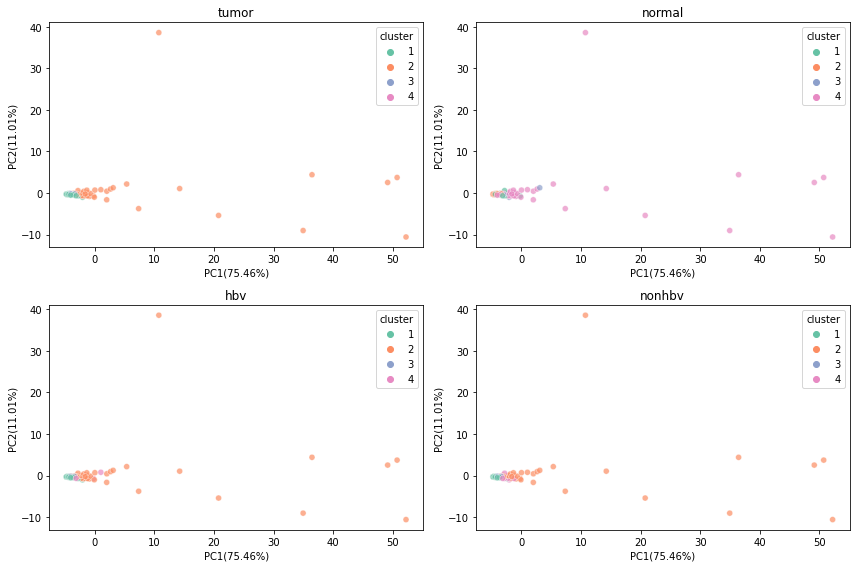

In [36]:
pca = PCA(n_components=2)
hallmark_pca = pca.fit_transform(hallmark_exp.to_numpy())
hallmark_pca_df = pd.DataFrame(hallmark_pca,index=hallmark_exp.index,columns=['PC1','PC2'])

fig,axes = plt.subplots(2,2,figsize = (12,8))
prefix_list = ['tumor','normal','hbv','nonhbv']
for idx,axs in enumerate(axes.ravel()) :
    consensus_label = pd.read_csv('/home/bruce1996/data/LIHC_anomaly_detection/hallmark_clustering/%s_hallmark_consensus_result.txt' % prefix_list[idx],sep='\t',index_col=0)
    plot_df = pd.concat([hallmark_pca_df,consensus_label],axis=1)
    sns.scatterplot(data=plot_df,x='PC1',y='PC2',hue='cluster',palette='Set2',alpha=0.7,ax=axs)
    axs.set_xlabel('PC1(' + str(round(100 * pca.explained_variance_ratio_[0],2)) + '%)')
    axs.set_ylabel('PC2(' + str(round(100 * pca.explained_variance_ratio_[1],2)) + '%)')
    axs.set_title(prefix_list[idx])
plt.tight_layout()
plt.savefig('/home/bruce1996/data/LIHC_anomaly_detection/fig/hallmark_gene_characteristic/hallmark_consensus_pca.png',dpi=300,bbox_inches='tight')